# Pregunta 4

In [10]:
import numpy as np
import seaborn as sbn
import networkx as nx
from random import choice, randint
import networkx.generators.random_graphs as nxgr

In [5]:
# Generando un grafo Erdos-Renyi
ER = nxgr.erdos_renyi_graph(1000, 2e-3)
# Generando un grafo Barabasi-Albert
BA = nx.barabasi_albert_graph(1000, 1)

In [6]:
def avalancha(G):
    estadisticas = dict()

    # Extrayendo la lista de nodos
    nodes = list(G.nodes())

    # Inicializando los baldes para cada nodo
    valdes = {node: randint(0, G.degree(node))  for node in nodes}

    iteracion = 0

    while iteracion != 10000:
        # Eligiendo un nodo al azar del grafo y consiguiendo a sus vecinos
        random_node = choice(nodes)

        if valdes[random_node] + 1 > G.degree(random_node):
            count = 0
            stack = []
            visitados = []
            
            stack.append(random_node)

            while len(stack) != 0:
                v = stack.pop()
                valdes[v] += 1

                if valdes[v] > G.degree(v) and v not in visitados:
                    visitados.append(v)
                    valdes[v] = 1
                    i = G.neighbors(v)
                    count += 1
                while True:
                    try:
                        node = next(i)
                        stack.append(node)
                    except StopIteration:
                        break
            if count not in estadisticas.keys():
                estadisticas[count] = 0
            estadisticas[count] += 1
            
        iteracion += 1
    
    return estadisticas

## Erdos-Renyi

In [17]:
avalancha_ER = avalancha(ER)

In [18]:
dator_ER = avalancha_ER.items()

X_ER = np.array([])
Y_ER = np.array([])

for x, y in dator_ER:
    X_ER = np.append(X_ER, np.array([x]))
    Y_ER = np.append(Y_ER, np.array([y]))

X_ER, Y_ER

(array([  3.,   1.,   4.,   2.,   6.,   8.,   9.,   5.,  11.,  10.,   7.,
         15.,  16.,  19.,  12.,  13.,  25.,  23.,  17.,  14.,  40.,  38.,
         33.,  29.,  18.,  43.,  24.,  22.,  35.,  26.,  44., 107.,  54.,
         30.,  42.,  64.,  27.,  34.,  74.,  36.,  61.,  47.,  82.,  20.,
         31., 214.,  46.,  37.,  50.,  62.,  49., 133.,  78.,  65.,  28.,
         39.,  95.,  96.,  67., 273., 125.,  73.,  21., 154., 405.,  91.,
         59., 599., 118.,  55.,  63., 453., 141.,  93.,  77., 268., 415.,
         81.,  52., 549., 699., 237.,  89., 354., 120., 226., 454., 687.,
        769., 360., 707., 817.,  53., 136., 776., 803., 804., 742., 820.,
        819., 818., 825., 796., 802., 814., 816., 811., 815.,  66., 759.,
        806., 821., 823., 807., 822.]),
 array([1.940e+02, 1.445e+03, 1.010e+02, 5.550e+02, 8.100e+01, 2.500e+01,
        3.600e+01, 1.230e+02, 2.400e+01, 2.200e+01, 6.200e+01, 1.100e+01,
        8.000e+00, 8.000e+00, 1.200e+01, 8.000e+00, 4.000e+00, 9.000e+00

Text(0.5, 1.0, 'Distribucion de Avalanchas Erdos-Renyi')

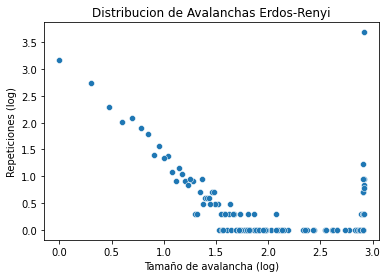

In [27]:
X_ER_log = np.log10(X_ER)
Y_ER_log = np.log10(Y_ER)

ax = sbn.scatterplot(x=X_ER_log, y=Y_ER_log)
ax.set_xlabel('Tamaño de avalancha (log)')
ax.set_ylabel('Repeticiones (log)')
ax.set_title('Distribucion de Avalanchas Erdos-Renyi')

## Barabasi-Albert

In [20]:
avalancha_BA = avalancha(BA)

In [21]:
dator_BA = avalancha_BA.items()

X_BA = np.array([])
Y_BA = np.array([])

for x, y in dator_ER:
    X_BA = np.append(X_BA, np.array([x]))
    Y_BA = np.append(Y_BA, np.array([y]))

X_BA, Y_BA

(array([  3.,   1.,   4.,   2.,   6.,   8.,   9.,   5.,  11.,  10.,   7.,
         15.,  16.,  19.,  12.,  13.,  25.,  23.,  17.,  14.,  40.,  38.,
         33.,  29.,  18.,  43.,  24.,  22.,  35.,  26.,  44., 107.,  54.,
         30.,  42.,  64.,  27.,  34.,  74.,  36.,  61.,  47.,  82.,  20.,
         31., 214.,  46.,  37.,  50.,  62.,  49., 133.,  78.,  65.,  28.,
         39.,  95.,  96.,  67., 273., 125.,  73.,  21., 154., 405.,  91.,
         59., 599., 118.,  55.,  63., 453., 141.,  93.,  77., 268., 415.,
         81.,  52., 549., 699., 237.,  89., 354., 120., 226., 454., 687.,
        769., 360., 707., 817.,  53., 136., 776., 803., 804., 742., 820.,
        819., 818., 825., 796., 802., 814., 816., 811., 815.,  66., 759.,
        806., 821., 823., 807., 822.]),
 array([1.940e+02, 1.445e+03, 1.010e+02, 5.550e+02, 8.100e+01, 2.500e+01,
        3.600e+01, 1.230e+02, 2.400e+01, 2.200e+01, 6.200e+01, 1.100e+01,
        8.000e+00, 8.000e+00, 1.200e+01, 8.000e+00, 4.000e+00, 9.000e+00

Text(0.5, 1.0, 'Distribucion de Avalanchas Barabasi-Albert')

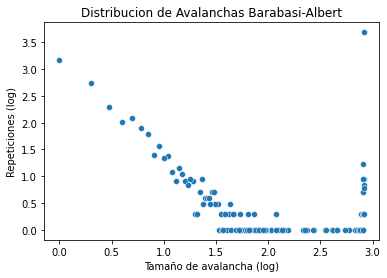

In [26]:
X_BA_log = np.log10(X_BA)
Y_BA_log = np.log10(Y_BA)

ax = sbn.scatterplot(x=X_BA_log, y=Y_BA_log)
ax.set_xlabel('Tamaño de avalancha (log)')
ax.set_ylabel('Repeticiones (log)')
ax.set_title('Distribucion de Avalanchas Barabasi-Albert')